# Overview of seaborn plotting functions

## Similar functions for similar tasks

seaborn 네임 스페이스* 는 수평적입니다. 모든 기능은 최상위 수준에서 액세스할 수 있습니다.   
그러나 코드 자체는 서로 다른 수단을 통해 유사한 시각화 목표를 달성하는 **함수 모듈**로 계층 구조로 구성되어 있습니다.   
대부분의 문서는 이러한 **모듈을 중심**으로 구성되어 있습니다.  
"관계형(relational)", "분산형(distributional)" 및 "범주형(categorical)"과 같은 이름을 접하게 될 것입니다.   
   
     ex. distributions 모듈 - 데이터의 분포를 나타내는 데 특화된 함수 정의. 히스토그램과 같은 방법 포함
   
- - - 
네임 스페이스* 관련 참고 : https://hcnoh.github.io/2019-01-30-python-namespace


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

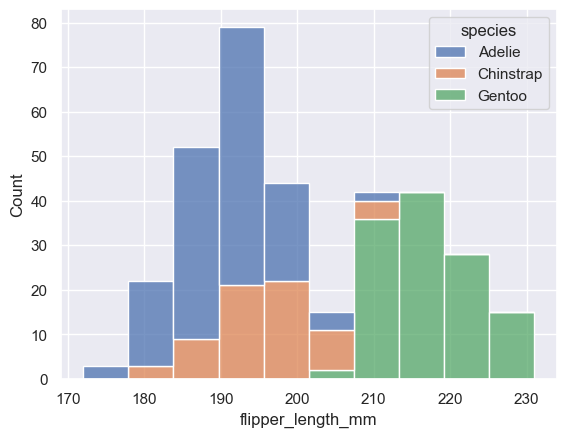

In [2]:
penguins = sns.load_dataset("penguins")

# 히스토그램
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack") # multiple : layer(default), dodge, stack, fill

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

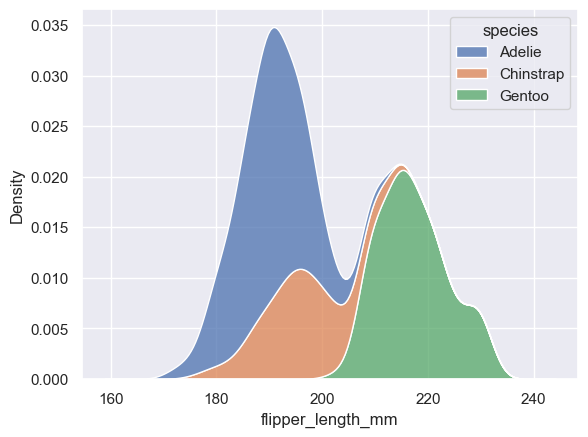

In [3]:
# kde 플롯
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

모듈 내의 함수는 많은 **기본 코드 공유**하고 **유사한 기능(예: 위 예제의 multiple="stack") 제공**   
표현 방법 별 장단점이 다르기 때문에 다양한 표현 간 전환이 용이하도록 이렇게 설계됨

## Figure-level vs. axes-level functions

seaborn : axes-level 과 figure-level 로 분류
   
* axes-level : 함수의 반환 값인 단일 matplotlib.pyplot.Axes 객체에 데이터 표현 (ex. 위의 두 플롯)
* figure-level : 그림을 관리하는 Seaborn(주로 FacetGrid) 객체로 matplotlib과 상호작용

모듈별로 axes-level 기능을 제공하는 figure-level 기능이 있음(그림 참고)
![nn](../img/function_overview_8_0.png)

예시> displot()
- distributions 모듈의 figure-level 함수   
- 기본 동작 : histplot()과 동일한 코드를 사용하여 히스토그램 표현

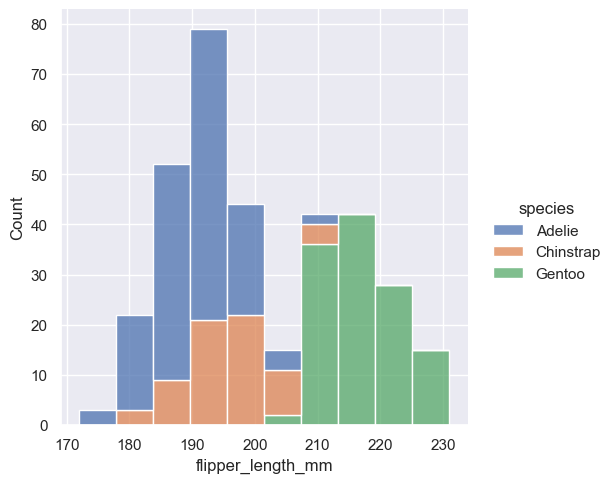

In [10]:
# figure-level 함수로 axes-level 함수와 같은 플롯 그리기 (histogram)
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

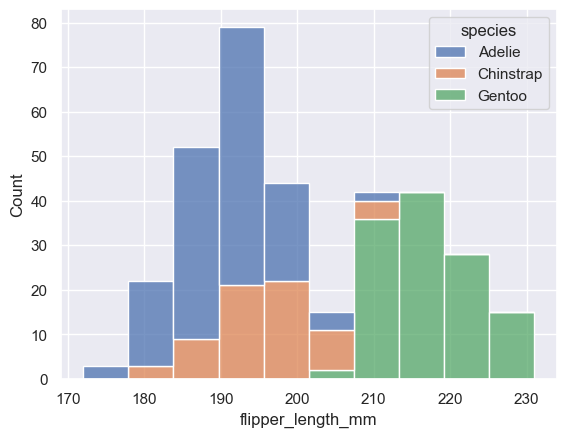

In [17]:
# axes-level (histogram)
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

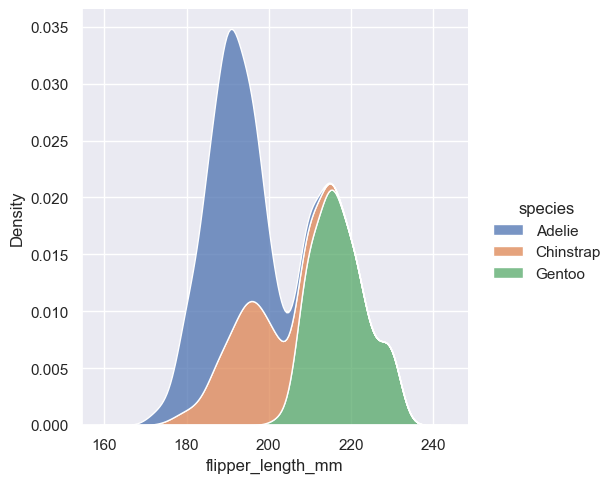

In [15]:
# figure-level 함수로 axes-level 함수와 같은 플롯 그리기 (kde)
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

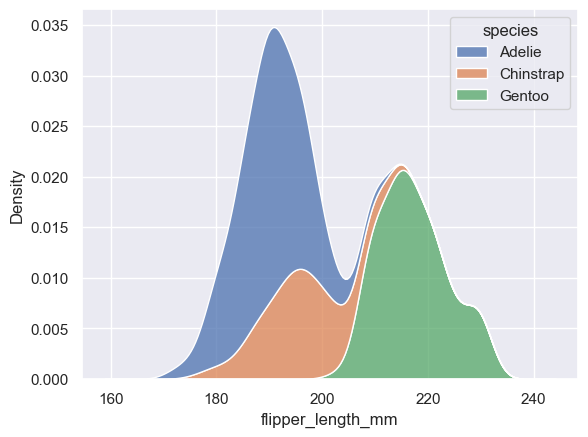

In [16]:
# axes-level (kde)
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

**차이점**
   
* 범례 : (FL)플롯 외부, (AL) 플롯 내부에 배치
   
**Figure-level의 유용성**
   
* 서브플롯 생성이 간단함 : 예 - 종별 분포 서브플롯 작성

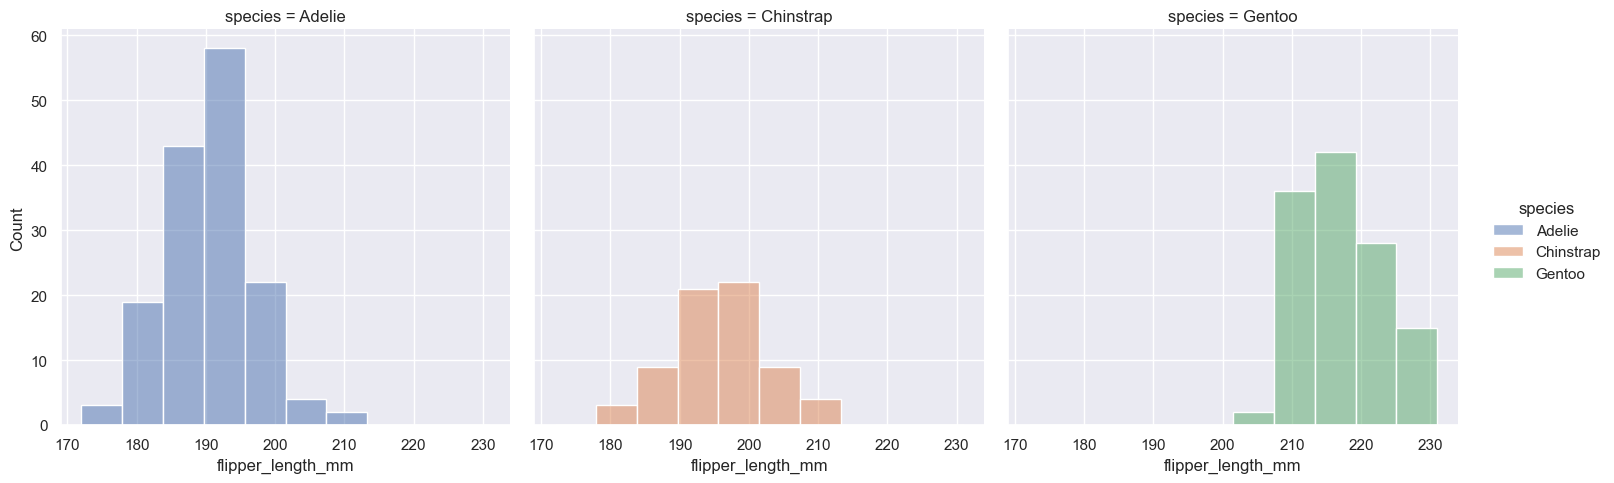

In [6]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

**figure-level 함수로 axes-level 함수를 사용할 때의 단점**

* 독스트링 검색이 어려움

### Axes-level functions make self-contained plots

* Axes-level 함수는 matplotlib 처럼 작성   
* 축 레이블, 범례 자동 추가 (그외 항목 수정 X)
* matplotlob과 함께 구성 가능

Axes-level 함수는 내부적으로 matplotlib.pyplot.gca()를 호출하여 matplotlib 인터페이스에 연결하여 "현재 활성" 축에 플롯을 그림    
'ax=' 인수가 허용되어 플롯 위치를 정확히 지정할 수 있음

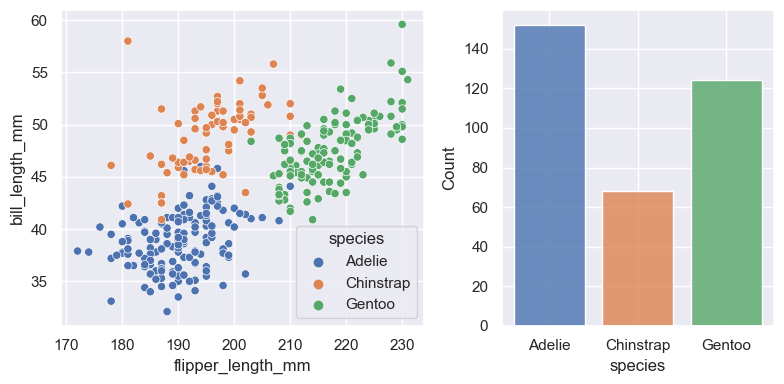

In [18]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3])) # row, col, figsize …
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

### Figure-level functions own their figure

Figure-level 함수는 다른 플롯과 (쉽게) 구성할 수 없음    
설계상 초기화를 포함해 자체 그림을 "소유"하므로 Figure-level 함수를 사용하여 기존 축에 플롯을 그리는 개념이 없음    
이 제약을 통해 Figure-level 함수는 범례를 플롯 외부에 배치하는 것과 같은 기능 구현

하지만, 반환하는 객체의 matplotlib 축에 액세스하고 플롯에 다른 요소를 추가하여 Figure-level 함수가 제공하는 것 이상을 수행하는 것도 가능

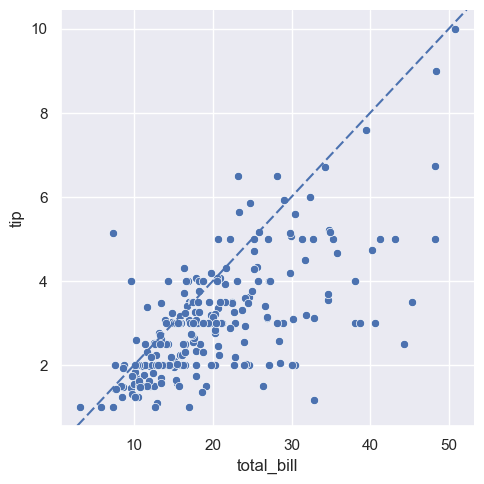

In [8]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

### Customizing plots from a figure-level function

* Figure-level 함수는 FacetGrid 인스턴스 반환    

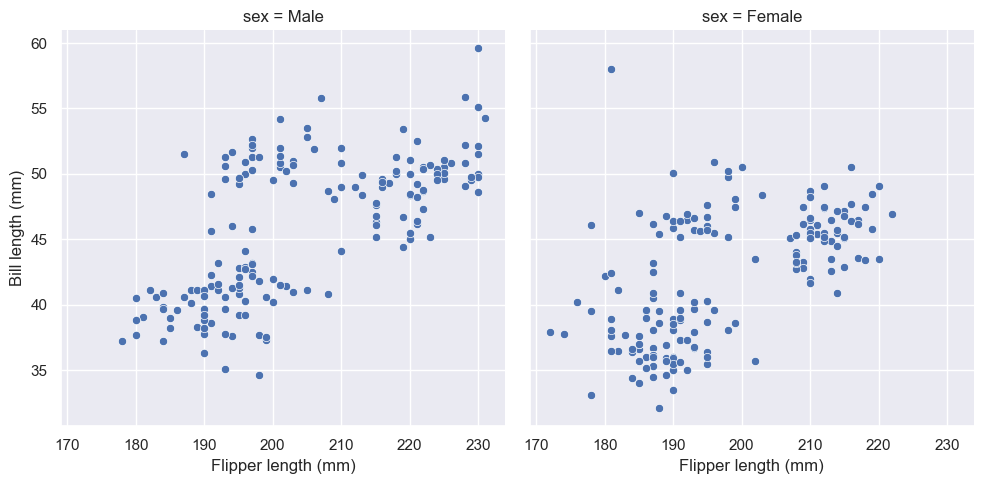

In [19]:
# 서브플롯의 속성을 사용자 정의하는 방법 예시
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

* 이 방법은 matplotlib API 가 아님
* Figure-level 함수 사용시에만 가능